# Computação Quântica na Prática — Introdução aos Qubits

A computação quântica estuda tarefas de processamento **de informação** que podem superar limites clássicos ao explorar fenômenos exclusivamente quânticos, como *superposição* e *emaranhamento*.

---

## Bit Clássico

- Entidade matemática que só pode assumir **dois valores**: `0` ou `1`.
- Menor unidade de informação na computação clássica.
- Implementação física: transistores e circuitos eletrônicos (leis da eletricidade clássica).
- Portas lógicas típicas: AND, OR, NOT.

---

## Qubit — “Bit” Quântico

- Sistema físico quântico que pode existir numa **superposição linear** dos estados base $\ket{0}$ e $\ket{1}$:
  
  $$
  \ket{\psi} = \alpha \ket{0} + \beta \ket{1}, \qquad \alpha, \beta \in \mathbb{C},\; |\alpha|^2 + |\beta|^2 = 1.
  $$

  > A condição de normalização garante probabilidade total $1$.  
  > Fases globais ($e^{i\gamma}\ket{\psi}$) não afetam resultados físicos.

- Espaço de estados: espaço de Hilbert complexo bidimensional $\mathbb{C}^2$.
- Implementações físicas: circuitos supercondutores, átomos, íons aprisionados, fótons, etc.
- Evolução lógica: **portas quânticas unitárias** (X, Y, Z, H, CNOT…).

---

## Representação Matricial dos Estados Base

$$
\ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \qquad
\ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$

Logo,

$$
\ket{\psi} = \alpha
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
+ \beta
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
= \begin{bmatrix} \alpha \\ \beta \end{bmatrix}.
$$

---

## Representação Geométrica — Esfera de Bloch

- A **esfera de Bloch** fornece uma visualização dos estados **puros** de um qubit.
- Qualquer estado puro pode ser escrito como

  $$
  \ket{\psi} = \cos\!\left(\frac{\theta}{2}\right)\ket{0}
  + e^{i\phi}\sin\!\left(\frac{\theta}{2}\right)\ket{1},
  $$

  com  
  $\theta \in [0,\pi]$: ângulo polar,  
  $\phi \in [0,2\pi)$: ângulo azimutal.

- Pontos opostos na esfera diferem apenas por uma **fase global** (inobservável).
- Portas quânticas agem como **rotações** dessa esfera, facilitando a intuição visual (veremos isso com o widget `BlochSphere` do Qiskit).

---

A seguir, usamos o Qiskit para visualizar o vetor de Bloch associado a três estados quânticos distintos:

- O estado $\ket{0}$ (norte da esfera),
- O estado $\ket{1}$ (sul da esfera),
- Um estado arbitrário $\ket{\psi(\theta,\phi)} = \cos(\theta/2)\ket{0} + e^{i\phi}\sin(\theta/2)\ket{1}$.


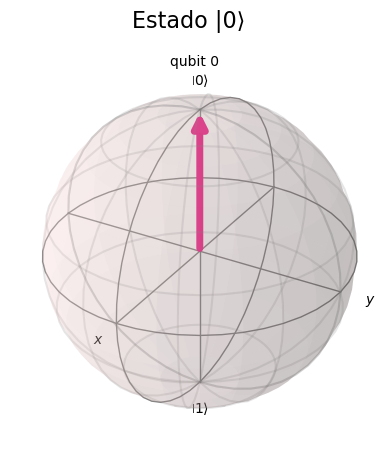

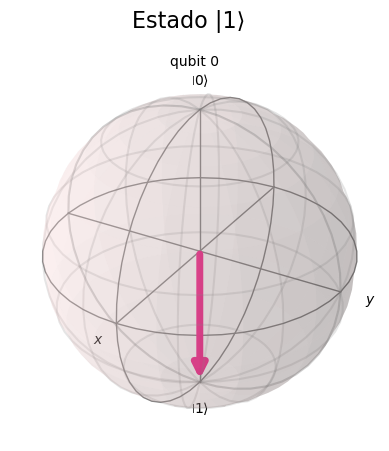

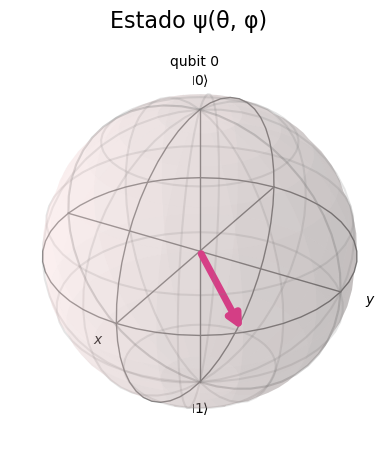

In [9]:
# Visualiza os vetores de Bloch para |0⟩, |1⟩ e um estado arbitrário ψ(θ,φ)

from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from IPython.display import display
import numpy as np

# --- Estados básicos |0⟩ e |1⟩
state0 = Statevector.from_label('0')
state1 = Statevector.from_label('1')

# --- Estado arbitrário ψ(θ, φ) = cos(θ/2)|0⟩ + e^{iφ} sin(θ/2)|1⟩
theta, phi = np.pi / 2, np.pi / 4     # escolha de ângulos (rad)
alpha = np.cos(theta / 2)
beta  = np.exp(1j * phi) * np.sin(theta / 2)
state_psi = Statevector([alpha, beta])

# --- Plots
fig0  = plot_bloch_multivector(state0,  title="Estado |0⟩")
fig1  = plot_bloch_multivector(state1,  title="Estado |1⟩")
figψ  = plot_bloch_multivector(state_psi, title="Estado ψ(θ, φ)")

display(fig0, fig1, figψ)


Use os sliders abaixo para modificar os ângulos $\theta$ e $\phi$ que definem o estado puro:

$$
\ket{\psi} = \cos\left(\frac{\theta}{2}\right)\ket{0} + e^{i\phi}\sin\left(\frac{\theta}{2}\right)\ket{1}
$$

- O ângulo $\theta$ (de 0° a 180°) define a posição entre o norte e o sul da esfera.
- O ângulo $\phi$ (de 0° a 360°) define a rotação em torno do eixo z.

Observe como o vetor de Bloch se move conforme esses parâmetros mudam. Isso ajuda a entender visualmente o espaço de estados puros de um qubit.


In [10]:
# Interatividade: vetor de Bloch para ψ(θ, φ)

import ipywidgets as widgets

def bloch_widget(theta_deg=60, phi_deg=45):
    theta, phi = np.deg2rad(theta_deg), np.deg2rad(phi_deg)
    state = Statevector([np.cos(theta/2),
                         np.exp(1j * phi) * np.sin(theta/2)])
    return plot_bloch_multivector(state,
                                  title=f"ψ(θ={theta_deg}°, φ={phi_deg}°)")

widgets.interact(bloch_widget,
                 theta_deg=widgets.IntSlider(60, 0, 180, 1, description="θ (°)"),
                 phi_deg=widgets.IntSlider(45, 0, 360, 1, description="φ (°)"));


interactive(children=(IntSlider(value=60, description='θ (°)', max=180), IntSlider(value=45, description='φ (°…

---

# Portas Lógicas de 1 Qubit

Em computação quântica, a manipulação da informação ocorre por meio de **portas quânticas**, que são representadas por **operações lineares unitárias**.

- **Fios**: carregam a informação (os qubits).
- **Portas**: manipulam a informação.

---

## Propriedades das Portas Quânticas

- **Linearidade**: As portas obedecem às regras da álgebra linear:

$$
U(\alpha\ket{\psi_1} + \beta\ket{\psi_2}) = \alpha U\ket{\psi_1} + \beta U\ket{\psi_2}
$$

- **Unitariedade**: Toda porta quântica é reversível. A matriz $U$ satisfaz:

$$
U^{\dagger}U = UU^{\dagger} = I
$$

---

## Porta X (NOT Quântico)

- Também chamada de **Porta Pauli-X**.
- Realiza uma inversão entre os estados $\ket{0}$ e $\ket{1}$, como a porta NOT clássica.
- Representação matricial:

$$
X = \sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

### Exemplo:

Aplicando $X$ ao estado $\ket{0}$:

$$
X\ket{0} = 
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
= \ket{1}
$$

> A porta $X$ **troca** os estados: $X\ket{0} = \ket{1}$, $X\ket{1} = \ket{0}$.

---

## Porta Z

- Também chamada de **Porta Pauli-Z**.
- Aplica uma **mudança de fase** no estado $\ket{1}$; deixa $\ket{0}$ inalterado.
- Representação matricial:

$$
Z = \sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

### Exemplo:

Aplicando $Z$ ao estado $\ket{0}$:

$$
Z\ket{0} =
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
= \ket{0}
$$

Aplicando ao estado $\ket{1}$:

$$
Z\ket{1} =
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 0 \\ -1 \end{bmatrix}
= -\ket{1}
$$

> A porta $Z$ **inverte a fase** do estado $\ket{1}$, mas não altera a probabilidade de medição.

---

## Porta Y

- Também chamada de **Porta Pauli-Y**.
- Aplica rotação no plano $XZ$, com efeito de inversão **e** mudança de fase.
- Representação matricial:

$$
Y = \sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
$$

### Exemplo:

Aplicando ao estado $\ket{0}$:

$$
Y\ket{0} = 
\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
= 
\begin{bmatrix} 0 \\ i \end{bmatrix}
= i\ket{1}
$$

> A porta $Y$ troca os estados $\ket{0}$ e $\ket{1}$ **com fase complexa**:  
> $Y\ket{0} = i\ket{1}$, $Y\ket{1} = -i\ket{0}$.

---

## Porta Hadamard (H)

- Cria **superposição** a partir dos estados base.
- Representação matricial:

$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

### Exemplo:

Aplicando $H$ ao estado $\ket{0}$:

$$
H\ket{0} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}
= \ket{+}
$$

> A porta Hadamard transforma:
> - $\ket{0} \to \ket{+} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$
> - $\ket{1} \to \ket{-} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$

---

Essas portas correspondem a rotações na esfera de Bloch e são fundamentais na construção de algoritmos quânticos.


---

# Introdução a Circuitos Quânticos no Qiskit

Em computação quântica, a manipulação dos qubits é feita por meio de **circuitos quânticos**. Esses circuitos contêm:

- Um **registro quântico** (quantum register), que representa um conjunto de qubits.
- (Opcionalmente) um **registro clássico**, que armazena o resultado da medição.
- Uma sequência de **portas quânticas** aplicadas sobre os qubits.

No Qiskit, usamos as seguintes classes para criar circuitos:

- `QuantumRegister`: define os qubits usados.
- `ClassicalRegister`: define os bits clássicos (para medições).
- `QuantumCircuit`: define o circuito quântico propriamente dito, unindo os registros e as operações.

---

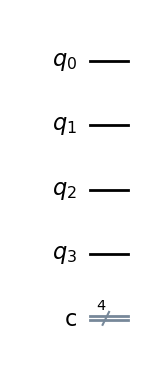

In [13]:
## Exemplo: Criando um circuito com 4 qubits

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Registro de 4 qubits
RQ = QuantumRegister(4, name="q")

# Registro clássico (opcional, usado apenas em medições)
RC = ClassicalRegister(4, name="c")

# Criação do circuito com os dois registros
circuit = QuantumCircuit(RQ, RC)

# Visualização gráfica do circuito (requer matplotlib)
circuit.draw(output='mpl')

Agora aplicamos as portas quânticas aos qubits do circuito:

- Porta **X** no qubit 0: inverte $\ket{0}$ em $\ket{1}$.
- Porta **Y** no qubit 1: inverte com mudança de fase.
- Porta **Z** no qubit 2: aplica uma mudança de fase em $\ket{1}$.
- Porta **H** no qubit 3: coloca o qubit em superposição.

A figura abaixo mostra o circuito com essas operações.


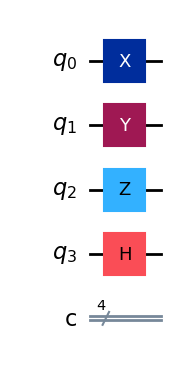

In [33]:

# Registro de 4 qubits
RQ = QuantumRegister(4, name="q")

# Registro clássico (opcional, usado apenas em medições)
RC = ClassicalRegister(4, name="c")

# Criação do circuito com os dois registros
circuit = QuantumCircuit(RQ, RC)

# Aplicação das portas
circuit.x(RQ[0])  # Porta X no qubit 0
circuit.y(RQ[1])  # Porta Y no qubit 1
circuit.z(RQ[2])  # Porta Z no qubit 2
circuit.h(RQ[3])  # Porta H no qubit 3

# Visualização gráfica do circuito
circuit.draw(output='mpl')


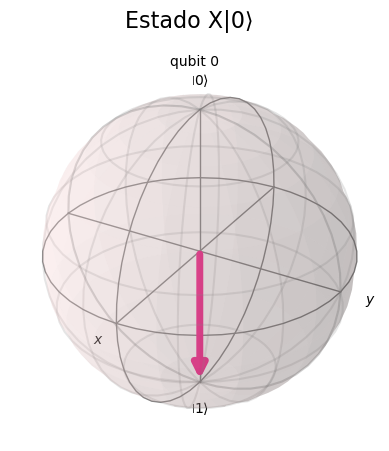

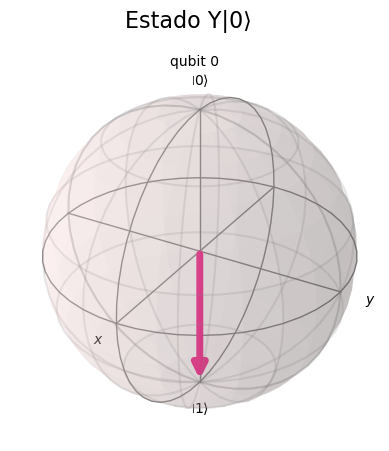

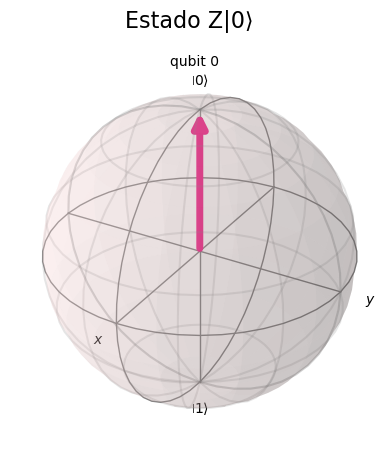

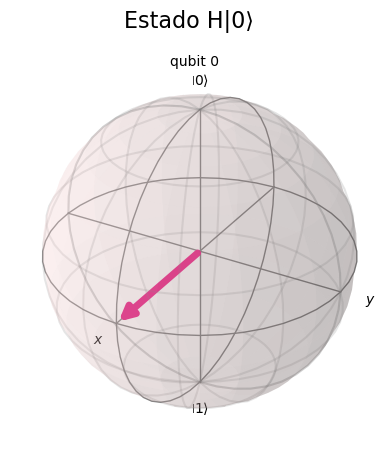

In [28]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display

# --- Qubit após porta X ---
qc_x = QuantumCircuit(1)
qc_x.x(0)
estado_x = Statevector.from_instruction(qc_x)
fig_x = plot_bloch_multivector(estado_x, title="Estado X|0⟩")
display(fig_x)

# --- Qubit após porta Y ---
qc_y = QuantumCircuit(1)
qc_y.y(0)
estado_y = Statevector.from_instruction(qc_y)
fig_y = plot_bloch_multivector(estado_y, title="Estado Y|0⟩")
display(fig_y)

# --- Qubit após porta Z ---
qc_z = QuantumCircuit(1)
qc_z.z(0)
estado_z = Statevector.from_instruction(qc_z)
fig_z = plot_bloch_multivector(estado_z, title="Estado Z|0⟩")
display(fig_z)

# --- Qubit após porta H ---
qc_h = QuantumCircuit(1)
qc_h.h(0)
estado_h = Statevector.from_instruction(qc_h)
fig_h = plot_bloch_multivector(estado_h, title="Estado H|0⟩")
display(fig_h)


---

# Medição na Base Computacional

Quando **medimos** um qubit na **base computacional** $\{\ket{0},\ket{1}\}$, projetamos o estado quântico sobre um desses dois vetores-base e obtemos um resultado clássico, `0` ou `1`.

---

## Postulado da Medição

Dado um estado puro

$$
\ket{\psi} \;=\; \alpha \ket{0} \;+\; \beta \ket{1},
\qquad |\alpha|^{2} + |\beta|^{2} = 1,
$$

- a probabilidade de observar o resultado **`0`** é  

  $$
  P(0) \;=\; |\alpha|^{2},
  $$

- a probabilidade de observar o resultado **`1`** é  

  $$
  P(1) \;=\; |\beta|^{2}.
  $$

Após a medição, o estado **colapsa** para o vetor correspondente ao resultado obtido.

---


---

## Casos de Referência

A seguir, apresentamos três situações típicas de medição na base computacional, considerando estados puros de um único qubit.

---

**1. Estado $\ket{0}$**

- Probabilidade de obter o resultado `0`:  
  $$
  P(0) = 1
  $$
- Probabilidade de obter o resultado `1`:  
  $$
  P(1) = 0
  $$
- Após a medição: o estado permanece $\ket{0}$.

---

**2. Estado $\ket{1}$**

- Probabilidade de obter o resultado `0`:  
  $$
  P(0) = 0
  $$
- Probabilidade de obter o resultado `1`:  
  $$
  P(1) = 1
  $$
- Após a medição: o estado permanece $\ket{1}$.

---

**3. Estado geral $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$**

- Probabilidade de obter o resultado `0`:  
  $$
  P(0) = |\alpha|^2
  $$
- Probabilidade de obter o resultado `1`:  
  $$
  P(1) = |\beta|^2
  $$
- Após a medição:
  - Se o resultado foi `0`, o estado colapsa para $\ket{0}$.
  - Se o resultado foi `1`, o estado colapsa para $\ket{1}$.

---

Esses exemplos ilustram o comportamento estatístico da medição quântica e servirão como base para interpretar os resultados obtidos via simulação nas células seguintes.


---

## Expectativa em Simulações

Ao rodar um circuito muitas vezes (**shots**) num simulador (por exemplo, 2048 execuções):

- Para $\ket{0}$ ou $\ket{1}$ os histogramas devem exibir **100 %** de contagens em `0` ou `1`, respectivamente.
- Para $\ket{\psi}$ esperamos frequências relativas próximas a $|\alpha|^{2}$ e $|\beta|^{2}$.  
  Com $N = 2048$ shots, as flutuações estatísticas típicas são da ordem de $\sqrt{N}/N \approx 2\%$.

---

## Próximo Passo

Na célula seguinte, usaremos o **Qiskit AerSimulator** para:

1. Construir circuitos que preparem $\ket{0}$, $\ket{1}$ e $\ket{\psi}$.
2. Adicionar portas de medição `measure`.
3. Executar com 2048 shots e plotar o histograma de contagens:

```python
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram


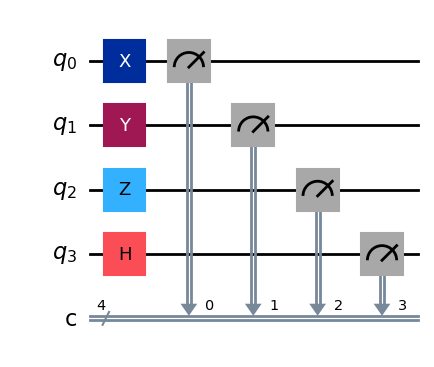

In [34]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

# Mede cada qubit no bit clássico correspondente
circuit.measure(0, 0)  # Medição após X
circuit.measure(1, 1)  # Medição após Y
circuit.measure(2, 2)  # Medição após Z
circuit.measure(3, 3)  # Medição após H

# Exibe o circuito com medições
circuit.draw(output='mpl')


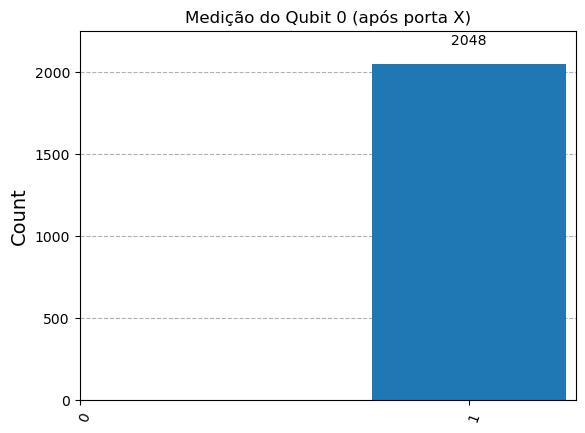

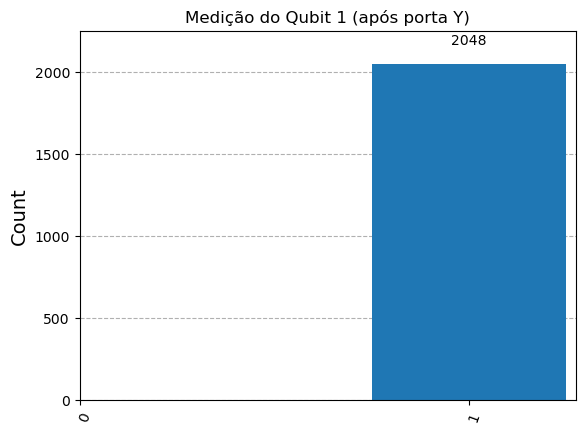

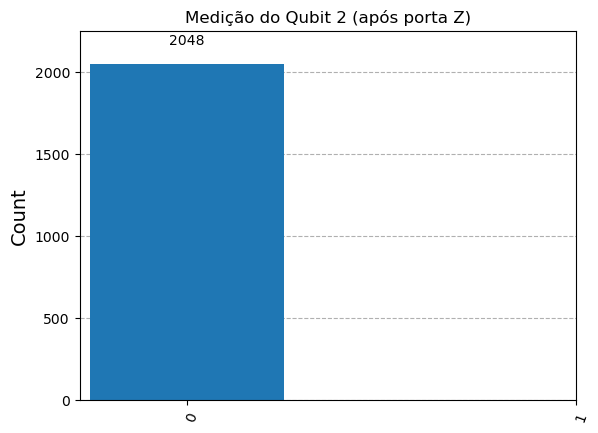

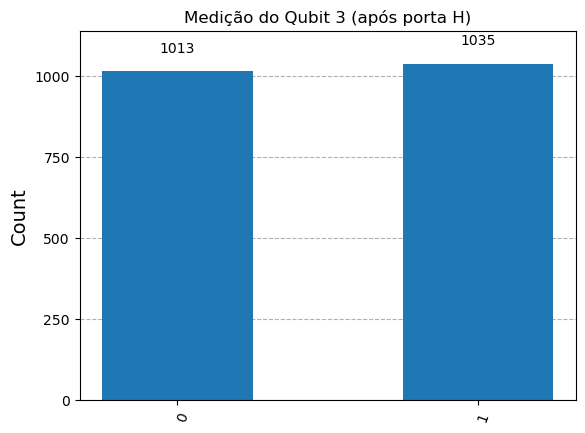

In [35]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

# Mede cada qubit no bit clássico correspondente
circuit.measure(0, 0)  # X|0>
circuit.measure(1, 1)  # Y|0>
circuit.measure(2, 2)  # Z|0>
circuit.measure(3, 3)  # H|0>

# Simulador local
simulador = AerSimulator()
circuito_pronto = transpile(circuit, simulador)

# Executa o circuito com múltiplos shots
job = simulador.run(circuito_pronto, shots=2048)
resultado = job.result()
contagens = resultado.get_counts()

# Rótulos descritivos em texto simples
rotulos = [
    "Medição do Qubit 0 (após porta X)",
    "Medição do Qubit 1 (após porta Y)",
    "Medição do Qubit 2 (após porta Z)",
    "Medição do Qubit 3 (após porta H)"
]

# Plota os histogramas individuais
for i in range(4):
    contagens_qubit = {'0': 0, '1': 0}
    for bitstring, freq in contagens.items():
        bit = bitstring[::-1][i]  # Qiskit usa ordem reversa
        contagens_qubit[bit] += freq
    display(plot_histogram(contagens_qubit, title=rotulos[i]))


---

# Experimentos: Medindo o efeito de portas X, Y, Z e H

A seguir construímos **dois circuitos** com 4 qubits cada:

1. **Estado inicial $\ket{1}$** – preparamos cada qubit em $\ket{1}$ aplicando X e, em
   seguida, aplicamos X, Y, Z e H (um por qubit).
2. **Estado inicial $\ket{+}$** – preparamos cada qubit em $\ket{+}
   = \tfrac{1}{\sqrt{2}}\bigl(\ket{0}+\ket{1}\bigr)$ aplicando H e,
   em seguida, aplicamos as mesmas portas.

Por fim, medimos todos os qubits na base computacional
e comparamos os histogramas de contagens com as previsões teóricas.

---
---
## Comentário teórico

- **Qubit 0**: $X\ket{1} = \ket{0}$  →  espera 100 % de `0`.
- **Qubit 1**: $Y\ket{1} = -i\ket{0}$ (fase irrelevante)  →  100 % de `0`.
- **Qubit 2**: $Z\ket{1} = -\ket{1}$  →  100 % de `1`.
- **Qubit 3**: $H\ket{1} = \ket{-} = \frac{1}{\sqrt{2}}(\ket{0}-\ket{1})$
  →  50 % de `0`, 50 % de `1`.

---

- **Qubit 0**: $X\ket{+} = \ket{+}$  
  \(\displaystyle P(0)=P(1)=50 %\)

- **Qubit 1**: $Y\ket{+} = i\ket{-}$  
  \(\displaystyle P(0)=P(1)=50 %\)

- **Qubit 2**: $Z\ket{+} = \ket{-}$  
  \(\displaystyle P(0)=P(1)=50 %\)

- **Qubit 3**: $H\ket{+} = \ket{0}$  
  \(\displaystyle P(0)=1,\; P(1)=0\)

Observe que, para os três primeiros qubits, o histograma deve exibir
aproximadamente metade das contagens em `0` e metade em `1`,
enquanto o quarto qubit deve colapsar sempre em `0`.

---


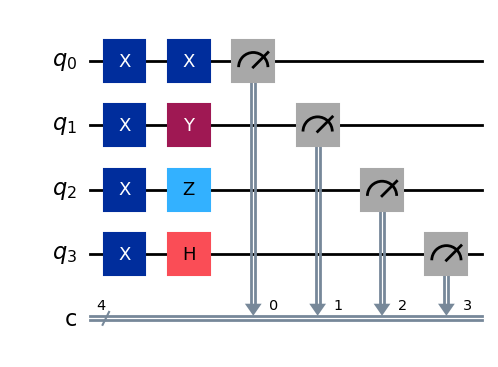

In [43]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from IPython.display import display

# Criação do circuito com 4 qubits e 4 bits clássicos
RQ = QuantumRegister(4, name="q")
RC = ClassicalRegister(4, name="c")
circuit = QuantumCircuit(RQ, RC)

# Inicializa todos os qubits em |1⟩ aplicando X
circuit.x(RQ[0])
circuit.x(RQ[1])
circuit.x(RQ[2])
circuit.x(RQ[3])

# Aplica a porta desejada em cada qubit já preparado em |1⟩
circuit.x(RQ[0])  # X|1⟩ → |0⟩
circuit.y(RQ[1])  # Y|1⟩ → -i|0⟩
circuit.z(RQ[2])  # Z|1⟩ → -|1⟩
circuit.h(RQ[3])  # H|1⟩ → |−⟩

# Mede cada qubit no bit clássico correspondente
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.measure(2, 2)
circuit.measure(3, 3)

# Visualiza o circuito
circuit.draw(output='mpl')


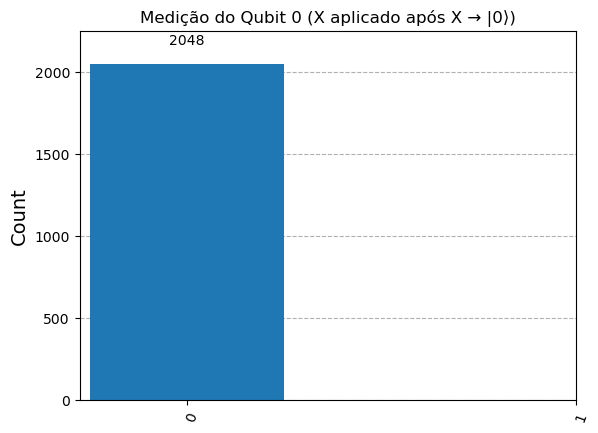

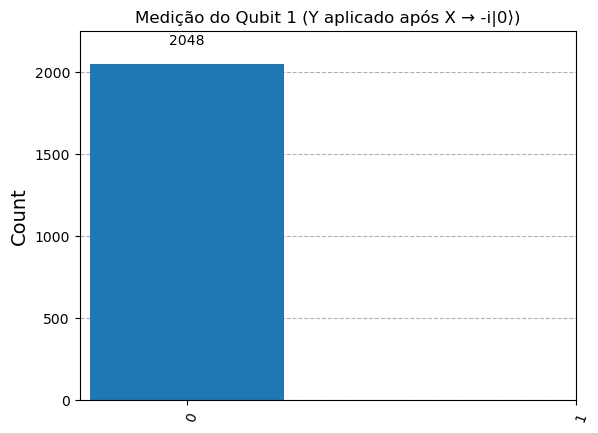

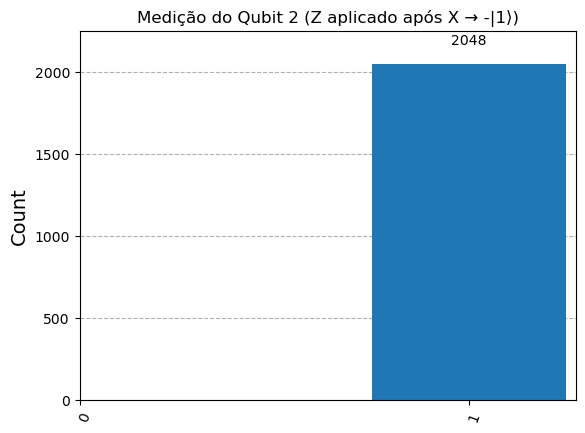

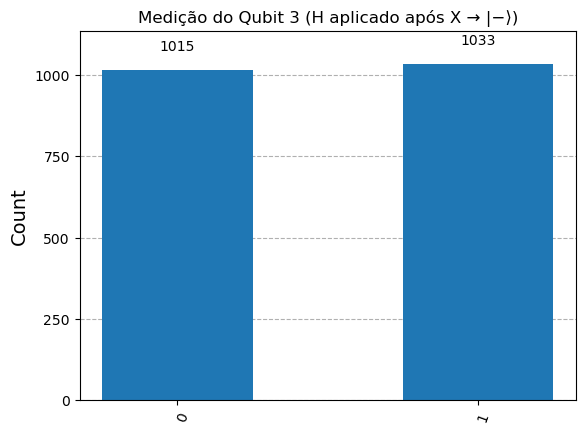

In [38]:
# Simulador e execução
simulador = AerSimulator()
circuito_pronto = transpile(circuit, simulador)

# Executa o circuito com múltiplos shots
job = simulador.run(circuito_pronto, shots=2048)
resultado = job.result()
contagens = resultado.get_counts()

# Títulos explicativos
rotulos = [
    "Medição do Qubit 0 (X aplicado após X → |0⟩)",
    "Medição do Qubit 1 (Y aplicado após X → -i|0⟩)",
    "Medição do Qubit 2 (Z aplicado após X → -|1⟩)",
    "Medição do Qubit 3 (H aplicado após X → |−⟩)"
]

# Histogramas individuais
for i in range(4):
    contagens_qubit = {'0': 0, '1': 0}
    for bitstring, freq in contagens.items():
        bit = bitstring[::-1][i]
        contagens_qubit[bit] += freq
    display(plot_histogram(contagens_qubit, title=rotulos[i]))


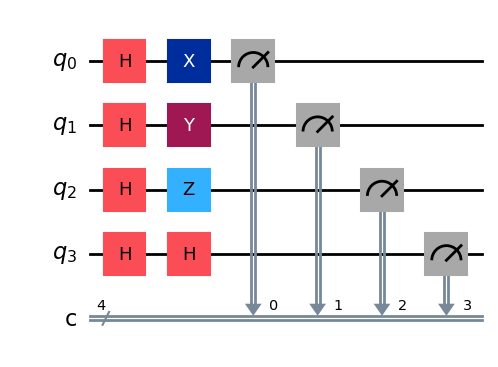

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

# Criação do circuito com 4 qubits e 4 bits clássicos
RQ = QuantumRegister(4, name="q")
RC = ClassicalRegister(4, name="c")
circuit = QuantumCircuit(RQ, RC)

# Inicializa todos os qubits em |+⟩ aplicando H
circuit.h(RQ[0])
circuit.h(RQ[1])
circuit.h(RQ[2])
circuit.h(RQ[3])

# Aplica a porta desejada após o estado |+⟩
circuit.x(RQ[0])  # X|+⟩
circuit.y(RQ[1])  # Y|+⟩
circuit.z(RQ[2])  # Z|+⟩
circuit.h(RQ[3])  # H|+⟩ = H(H|0⟩) = |0⟩

# Mede cada qubit no bit clássico correspondente
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.measure(2, 2)
circuit.measure(3, 3)

# Visualiza o circuito
circuit.draw(output='mpl')



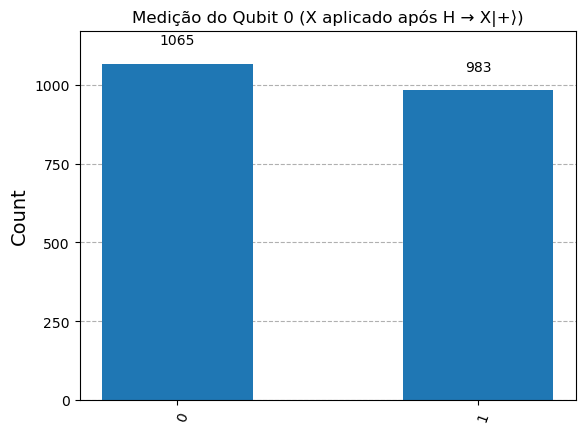

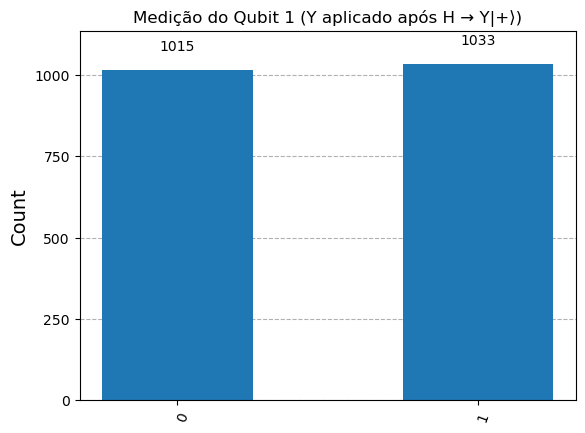

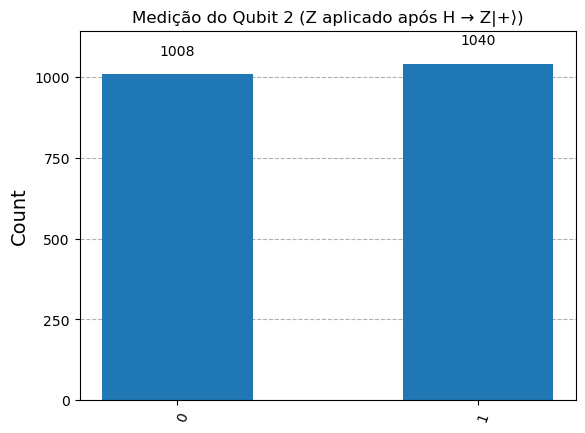

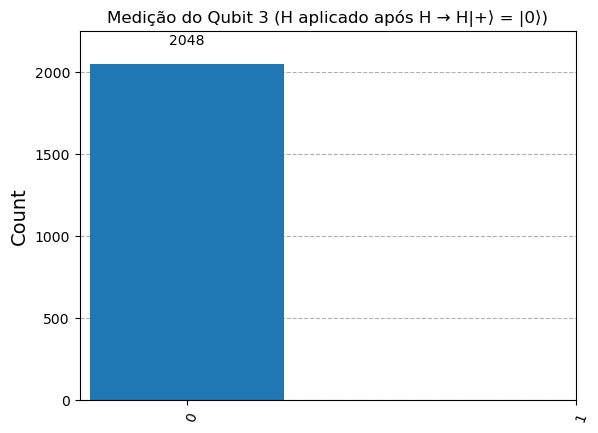

In [41]:
# Simulador e execução
simulador = AerSimulator()
circuito_pronto = transpile(circuit, simulador)

# Executa o circuito com múltiplos shots
job = simulador.run(circuito_pronto, shots=2048)
resultado = job.result()
contagens = resultado.get_counts()

# Títulos explicativos
rotulos = [
    "Medição do Qubit 0 (X aplicado após H → X|+⟩)",
    "Medição do Qubit 1 (Y aplicado após H → Y|+⟩)",
    "Medição do Qubit 2 (Z aplicado após H → Z|+⟩)",
    "Medição do Qubit 3 (H aplicado após H → H|+⟩ = |0⟩)"
]

# Histogramas individuais
for i in range(4):
    contagens_qubit = {'0': 0, '1': 0}
    for bitstring, freq in contagens.items():
        bit = bitstring[::-1][i]
        contagens_qubit[bit] += freq
    display(plot_histogram(contagens_qubit, title=rotulos[i]))


---

# Portas Lógicas de 2 Qubits  

Para operar sobre mais de um qubit ao mesmo tempo usamos **portas de 2 qubits** (ou multi-qubits em geral).  
Se cada qubit vive num espaço de Hilbert de dimensão 2, dois qubits vivem em  
$\mathscr H_{2\text{-qubits}} = \mathbb C^2 \otimes \mathbb C^2 \cong \mathbb C^{\,4}$,  
logo a matriz de uma porta de 2 qubits é **$4 \times 4$** (elemento do grupo unitário $U(4)$).

Essas portas podem criar **emaranhamento** e são essenciais para o poder computacional quântico.

---

## Porta CNOT — Controlled-NOT

### Analogia clássica  

No circuito clássico **controlled-NOT** temos dois bits:  
- **bit-controle $c$** (não alterado);  
- **bit-alvo $t$** (é invertido *somente* se $c=1$).

| $c$ (entrada) | $t$ (entrada) | $c$ (saída) | $t$ (saída) |
|--------------|--------------|-------------|-------------|
| 0            | 0            | 0           | 0           |
| 0            | 1            | 0           | 1           |
| 1            | 0            | 1           | 1           |
| 1            | 1            | 1           | 0           |

---

### Versão quântica  

Nos qubits a **CNOT** continua “copiando” o valor lógico do controle,  
mas agora atua linearmente sobre *qualquer* superposição.

- Base computacional ($\ket{c\,t}$ com $c,t\in\{0,1\}$):

$$
\text{CNOT}\,\ket{c\,t} =
\begin{cases}
\ket{0\,t}, & c=0,\\[6pt]
\ket{1\,\! \oplus t}, & c=1,
\end{cases}
$$

onde $\oplus$ é a soma módulo 2.

---

### O que significa “$\oplus$” (soma módulo 2)?

A notação $a \oplus b$ representa a **soma módulo 2**, também chamada **XOR** (exclusive-or) em lógica digital.  
Ela funciona assim:

| $a$ | $b$ | $a \oplus b$ |
|-----|-----|--------------|
| 0   | 0   | 0            |
| 0   | 1   | 1            |
| 1   | 0   | 1            |
| 1   | 1   | 0            |

Ou seja, o resultado é `1` **somente** quando exatamente um dos bits é `1`; caso contrário é `0`.

No contexto da porta **CNOT**:

- Se o qubit‐controle $c=0$, o alvo **não muda** (pois $0\oplus t = t$).
- Se $c=1$, o alvo **inverte** (pois $1\oplus t$ troca $0\leftrightarrow1$).

Assim, a regra compacta  
$$
\text{CNOT}\,\ket{c\,t} = \ket{c,\;c \oplus t}
$$
expressa exatamente o mesmo mapeamento mostrado na tabela clássica, mas vale para
qualquer estado clássico **ou** superposição quântica.

---


- Matriz $4\times4$ na ordem $\bigl\{\ket{00},\ket{01},\ket{10},\ket{11}\bigr\}$:

$$
\text{CNOT} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}.
$$

---

### Exemplos rápidos  

1. **Sem emaranhamento**  
   $$\text{CNOT}\,\ket{00} = \ket{00}, \qquad
     \text{CNOT}\,\ket{01} = \ket{01}. $$

2. **Criação de emaranhamento**  
   $$\ket{\psi} =
     \tfrac{1}{\sqrt2}\bigl(\ket{00}+\ket{10}\bigr)
     \;\;\xrightarrow{\;\text{CNOT}\;}\;\;
     \tfrac{1}{\sqrt2}\bigl(\ket{00}+\ket{11}\bigr)
     = \ket{\Phi^+},$$
   que é um dos quatro estados de Bell maximamente emaranhados.

---

A CNOT é o principal **bloco de construção para algoritmos quânticos**, permitindo combinar
portas de 1 qubit (universais em $SU(2)$) com uma interação controlada que gera emaranhamento.
Combinada a Hadamard e outras portas, ela possibilita implementações de algoritmos como
Deutsch–Jozsa, Grover, Shor e protocolos de teletransporte quântico.

---


---

# Construindo um Estado de Bell Passo a Passo

Neste experimento, construiremos o estado de Bell  
$$
\ket{\Phi^+} = \frac{1}{\sqrt{2}}\left(\ket{00} + \ket{11}\right)
$$
a partir do estado inicial $\ket{00}$, utilizando as portas **Hadamard** e **CNOT**.

Vamos analisar cada etapa separadamente, prevendo o estado final e as probabilidades associadas à medição na base computacional $\{\ket{00}, \ket{01}, \ket{10}, \ket{11}\}$.

---

## Etapa 1 — Estado inicial

O estado inicial do sistema é:
$$
\ket{\psi_0} = \ket{0}_1 \otimes \ket{0}_2 = \ket{00}
=
\begin{bmatrix}
1 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

Como nenhum qubit foi manipulado ainda, a **probabilidade de medição** é:
- `00`: $100\%$
- `01`, `10`, `11`: $0\%$

---

## Etapa 2 — Aplicação da Hadamard no qubit 0

Matriz da porta Hadamard ($H$):
$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

Matriz identidade $I$ (para o qubit 1):
$$
I = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

A operação total no sistema é $H \otimes I$:
$$
H \otimes I = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}
$$

Aplicando isso ao estado inicial $\ket{00}$:

$$
\ket{\psi_1} = (H \otimes I)\ket{00}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\ 0 \\ 1 \\ 0
\end{bmatrix}
= \frac{1}{\sqrt{2}}(\ket{00} + \ket{10})
$$

### Previsão de medição:
- `00`: $50\%$
- `10`: $50\%$
- `01`, `11`: $0\%$

---

## Etapa 3 — Aplicação da porta CNOT

A matriz da porta CNOT (controle no qubit 0, alvo no qubit 1) é:
$$
\text{CNOT} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

Aplicando a CNOT ao estado anterior:
$$
\text{CNOT}\left( \frac{1}{\sqrt{2}}(\ket{00} + \ket{10}) \right)
= \frac{1}{\sqrt{2}}(\text{CNOT}\ket{00} + \text{CNOT}\ket{10})
= \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})
= \ket{\Phi^+}
$$

---

### Estado final:

$$
\ket{\psi_2} = \ket{\Phi^+} =
\frac{1}{\sqrt{2}}(\ket{00} + \ket{11})
$$

### Previsão de medição:
- `00`: $50\%$
- `11`: $50\%$
- `01`, `10`: $0\%$

---

Esse é um dos quatro **estados de Bell** — estados **maximamente emaranhados** com correlação perfeita entre os qubits. A seguir, construiremos esse circuito no Qiskit e confi


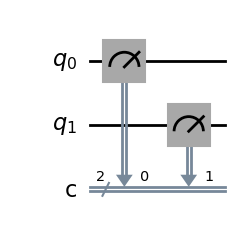

In [50]:
# Mesmo circuito, agora adicionando medições em cada qubit

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qreg = QuantumRegister(2, "q")
creg = ClassicalRegister(2, "c")

circuit_med = QuantumCircuit(qreg, creg)

# Mede qubit 0 → bit clássico 0, qubit 1 → bit clássico 1
circuit_med.measure(qreg[0], creg[0])
circuit_med.measure(qreg[1], creg[1])

# Exibe o circuito com medições
circuit_med.draw(output="mpl")


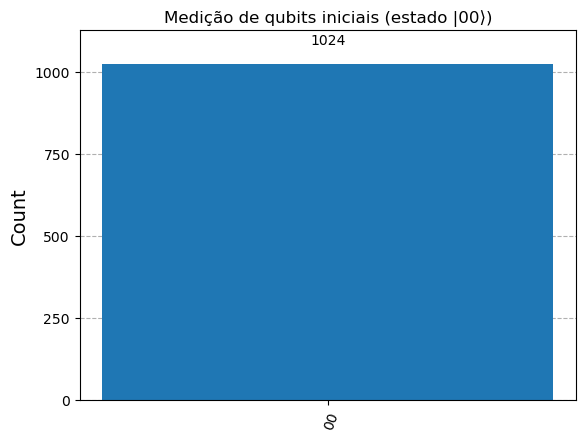

In [49]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

# Simulador local
simulador = AerSimulator()

# Transpila o circuito com medições
circuito_pronto = transpile(circuit_med, simulador)

# Executa o circuito com 1024 shots
job = simulador.run(circuito_pronto, shots=1024)
resultado = job.result()

# Obtém as contagens
contagens = resultado.get_counts()

# Exibe o histograma
display(plot_histogram(contagens, title="Medição de qubits iniciais (estado |00⟩)"))


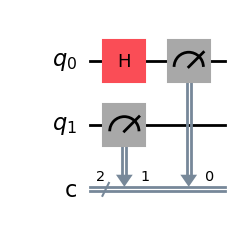

In [51]:
# Circuito com Hadamard no qubit 0 e medições em ambos os qubits

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Registros quântico e clássico
qreg = QuantumRegister(2, "q")
creg = ClassicalRegister(2, "c")

# Construção do circuito
circuit_hadamard = QuantumCircuit(qreg, creg)

# Aplica Hadamard ao qubit 0
circuit_hadamard.h(qreg[0])

# Mede qubit 0 → bit clássico 0, qubit 1 → bit clássico 1
circuit_hadamard.measure(qreg[0], creg[0])
circuit_hadamard.measure(qreg[1], creg[1])

# Exibe o circuito
circuit_hadamard.draw(output="mpl")


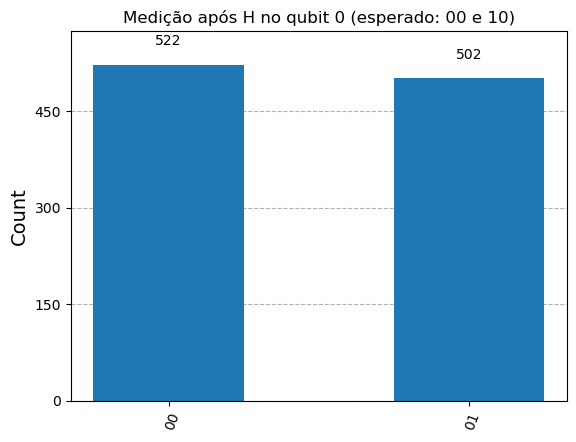

In [52]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

# Simulador local
simulador = AerSimulator()

# Transpila o circuito
circuito_pronto = transpile(circuit_hadamard, simulador)

# Executa o circuito com 1024 shots
job = simulador.run(circuito_pronto, shots=1024)
resultado = job.result()

# Obtém as contagens
contagens = resultado.get_counts()

# Exibe o histograma
display(plot_histogram(contagens, title="Medição após H no qubit 0 (esperado: 00 e 10)"))


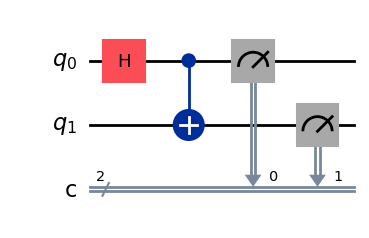

In [53]:
# Circuito com Hadamard no qubit 0, CNOT e medições

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Registros quântico e clássico
qreg = QuantumRegister(2, "q")
creg = ClassicalRegister(2, "c")

# Construção do circuito
circuit_bell = QuantumCircuit(qreg, creg)

# Aplica Hadamard ao qubit 0
circuit_bell.h(qreg[0])

# Aplica CNOT com controle no qubit 0 e alvo no qubit 1
circuit_bell.cx(qreg[0], qreg[1])

# Mede qubit 0 → bit clássico 0, qubit 1 → bit clássico 1
circuit_bell.measure(qreg[0], creg[0])
circuit_bell.measure(qreg[1], creg[1])

# Exibe o circuito
circuit_bell.draw(output="mpl")


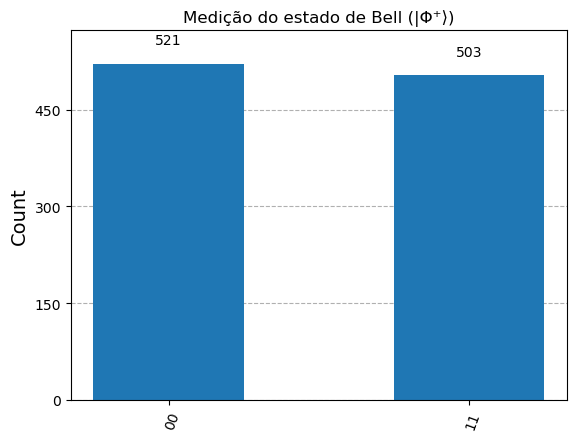

In [54]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

# Simulador local
simulador = AerSimulator()

# Transpila o circuito
circuito_pronto = transpile(circuit_bell, simulador)

# Executa o circuito com 1024 shots
job = simulador.run(circuito_pronto, shots=1024)
resultado = job.result()

# Obtém as contagens
contagens = resultado.get_counts()

# Exibe o histograma
display(plot_histogram(contagens, title="Medição do estado de Bell (|Φ⁺⟩)"))
